In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


data = pd.read_csv('Kolbotn_driftsdata_240924.csv')

print(data.columns)


Index(['Unnamed: 0', 'Tid', 'Til bane 1', 'Fra bane 1', 'Til bane 2',
       'Fra bane 2', '3201-RT402', '3201-RT502', 'Temperatur ned i 40 brønner',
       'Temperatur opp fra 40 brønner', 'Temperatur ned i 20 brønner',
       'Temperatur opp fra 20 brønner',
       'Temperatur opp fra alle brønner (hovedrør)',
       'Turtemperatur VP (varm side)', '3201-RT501',
       'Temperatur ut fra varmepumpe (kald side)',
       'Temperatur inn til varmepumpe (kald side)',
       'Temperaturføler i brønn (ytre)', 'Temperaturføler i brønn (midten)',
       'Trykkmåler (banekrets) (pascal)', 'BC-RN001',
       'Energi levert fra varmepumpe', 'Tilført energi - Bane 1',
       'Tilført energi - Bane 2', 'Utetemperatur', 'CO2 - Bane 1',
       'Strømforbruk', 'Tidsverdier', 'Tilført effekt - Bane 1',
       'Tilført effekt - Bane 2', 'Tilført effekt - Varmepumpe', 'COP',
       'Strømforbruk_akkumulert'],
      dtype='object')


In [24]:
data['Tid'] = pd.to_datetime(data['Tid'])

df = data.loc[(data['Tid'] >= '2023-10-01 00:00:00') & (data['Tid'] < '2024-04-01 00:00:00')]
df = df.reset_index(drop=True)
print(df)

      Unnamed: 0                 Tid  Til bane 1  Fra bane 1  Til bane 2  \
0              0 2023-11-01 01:01:00         NaN         NaN         NaN   
1              1 2023-11-01 02:01:00         NaN         NaN         NaN   
2              2 2023-11-01 03:01:00         NaN         NaN         NaN   
3              3 2023-11-01 04:01:00         NaN         NaN         NaN   
4              4 2023-11-01 05:01:00         NaN         NaN         NaN   
...          ...                 ...         ...         ...         ...   
3649        3649 2024-03-31 19:01:00         NaN         NaN         NaN   
3650        3650 2024-03-31 20:01:00         NaN         NaN         NaN   
3651        3651 2024-03-31 21:01:00         NaN         NaN         NaN   
3652        3652 2024-03-31 22:01:00         NaN         NaN         NaN   
3653        3653 2024-03-31 23:01:00         NaN         NaN         NaN   

      Fra bane 2  3201-RT402  3201-RT502  Temperatur ned i 40 brønner  \
0            N

In [33]:
def temperature_plot(df, series, min_value = 0, max_value = 10): #self,
    fig = px.line(df, x=df['Tidsverdier'], y=series, labels={'Value': series, 'Timestamp': 'Tid'}, color_discrete_sequence=[f"rgba(29, 60, 52, 0.75)"])
    fig.update_xaxes(type='category')
    fig.update_xaxes(
        title='',
        type='category',
        gridwidth=0.3,
        tickmode='auto',
        nticks=4,  
        tickangle=30)
    fig.update_yaxes(
        title=f"Temperatur (ºC)",
        tickformat=",",
        ticks="outside",
        gridcolor="lightgrey",
        gridwidth=0.3,
    )
    fig.update_layout(
        #xaxis=dict(showticklabels=False),
        showlegend=False,
        yaxis=dict(range=[min_value, max_value]),
        margin=dict(l=20,r=20,b=20,t=20,pad=0),
        #separators="* .*",
        #yaxis_title=f"Temperatur {series_name.lower()} (ºC)",
        xaxis_title="",
        height = 300,
        )
    #st.plotly_chart(fig, use_container_width=True, config = {'displayModeBar': False, 'staticPlot': False})
    fig.show()

In [35]:
temperature_plot(df=df, series='Til bane 1', min_value = 0, max_value = 10)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

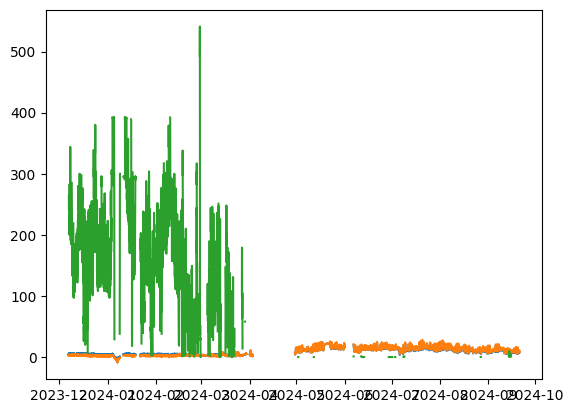

In [16]:
power_to_HP = data['Tilført effekt - Varmepumpe']

plt.plot(data['Tid'], data['Til bane 1'])
plt.plot(data['Tid'], data['Fra bane 1'])
plt.plot(data['Tid'], data['Tilført effekt - Bane 1'])
plt.show()

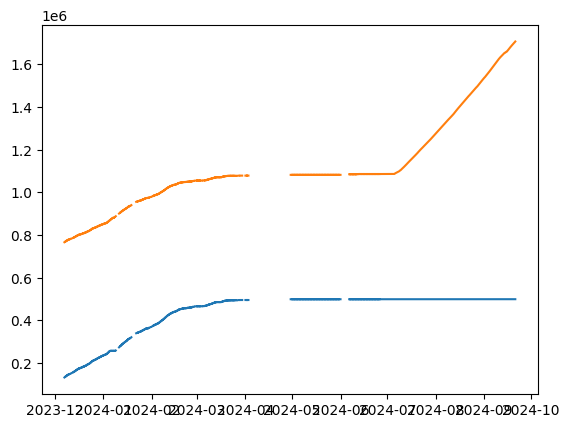

In [17]:
plt.plot(data['Tid'], data['Tilført energi - Bane 1'])
plt.plot(data['Tid'], data['Energi levert fra varmepumpe'])
plt.show()